# AUTO MARKERS STOCKS PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/top-48-automakers-daily-stock-prices-20102022/automakers stocks 2010-2022.csv')

In [3]:
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2009-12-31,TM,71.532616,84.160004,85.160004,84.160004,85.160004,223400.0
1,2009-12-31,F,6.710280,10.000000,10.060000,9.920000,10.040000,31253700.0
2,2009-12-31,HMC,33.738770,33.900002,34.040001,33.840000,33.840000,567400.0
3,2009-12-31,HYMTF,17.000000,17.000000,17.000000,17.000000,17.000000,0.0
4,2009-12-31,TTM,15.805059,16.860001,17.080000,16.830000,16.940001,586100.0


In [4]:
df.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [5]:
Sy = df['Symbol'].value_counts().reset_index()
Sy

,index,Symbol
0,VOW3.DE,3071
1,DAI.DE,3071
2,BMW.DE,3071
3,TM,3047
4,HMC,3047
5,HYMTF,3047
6,TTM,3047
7,PII,3047
8,F,3047
9,M&M.NS,2987


In [6]:
symbol = Sy[Sy['Symbol']  >=1000]

In [7]:
symbol.columns=['Symbol','counts']

In [8]:
symbol

,Symbol,counts
0,VOW3.DE,3071
1,DAI.DE,3071
2,BMW.DE,3071
3,TM,3047
4,HMC,3047
5,HYMTF,3047
6,TTM,3047
7,PII,3047
8,F,3047
9,M&M.NS,2987


Text(0.5, 0, 'Symble')

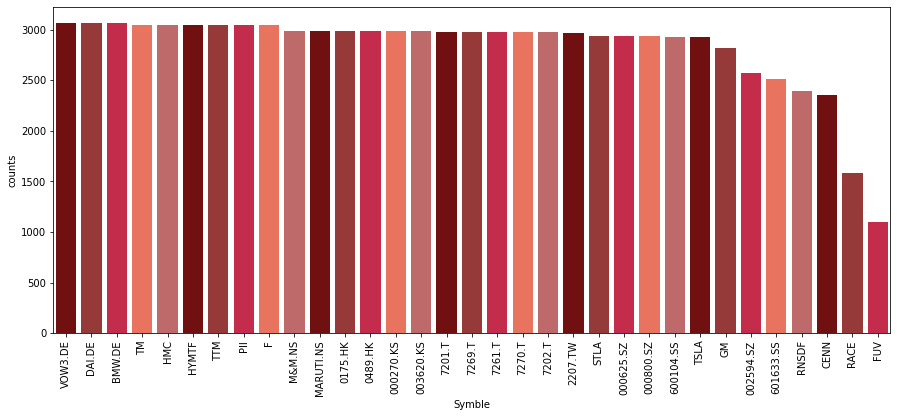

In [9]:
color = ['#800000','#A52A2A','#DC143C','#FF6347','#CD5C5C']
fig = plt.figure(figsize=(15,6))
sns.barplot(x=symbol['Symbol'],y=symbol['counts'],palette = color)
plt.tick_params(axis = 'x',rotation = 90)
plt.xlabel('Symble')

In [10]:
data = df[['Date','Close']]
data

,Date,Close
0,2009-12-31,84.160004
1,2009-12-31,10.000000
2,2009-12-31,33.900002
3,2009-12-31,17.000000
4,2009-12-31,16.860001
...,...,...
101121,2022-02-08,609.000000
101122,2022-02-08,1471.000000
101123,2022-02-08,7.160000
101124,2022-02-08,9.580000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101126 entries, 0 to 101125
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    101126 non-null  object 
 1   Close   101126 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [12]:
data['Date'] = pd.to_datetime(data['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data['year'] = data['Date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101126 entries, 0 to 101125
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    101126 non-null  datetime64[ns]
 1   Close   101126 non-null  float64       
 2   year    101126 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.3 MB


In [15]:
data = data.set_index('year')

In [16]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [17]:
data = data.drop(columns='Date',axis=1)

In [18]:
data

,Close
year,
2009,84.160004
2009,10.000000
2009,33.900002
2009,17.000000
2009,16.860001
...,...
2022,609.000000
2022,1471.000000
2022,7.160000


In [19]:
data = np.log(data)

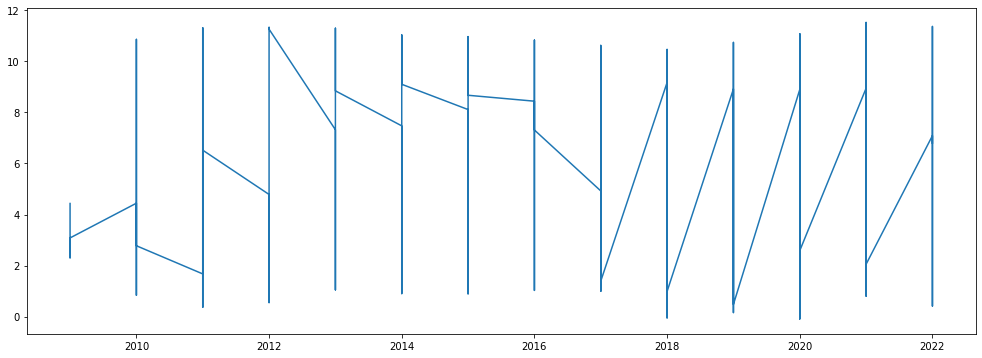

In [20]:
fig = plt.figure(figsize=(17,6))
plt.plot(data)

In [21]:
# this data is not stationary,you convert the stationary ofter predict the next year 

In [22]:
#1.rolling methods

In [23]:
#stationary is mean ,std is constant 

In [24]:
rolling_mean = data.rolling(12).mean()
rolling_std = data.rolling(12).std()
rollmean = rolling_mean.dropna()
rollstd = rolling_std.dropna()

In [25]:
ax.legend=(['Rolling mean','Rolling std','Original'])
fig = plt.figure(figsize=(17,6))
fig,ax = plt.subplots(figsize=(17,8))
ax1 = plt.plot(rollmean)
ax2 = plt.plot(rollstd)
ax3 = plt.plot(data)
ax.legend(['Rolling mean','Rolling std','Original'])


NameError: name 'ax' is not defined

In [ ]:
#adufuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(data)

In [ ]:
def adfuller_test(data):
    result = adfuller(data)
    print(result)
if result[1] <= 0.05:
    print(result[1] ,'is statonary')
    
else:
    print('is not statonary')

In [ ]:
#defferencing

In [ ]:
datashift1 = data-data.shift(1)
datashift1 = datashift1.dropna()

In [ ]:
fig = plt.figure(figsize=(18,7))
plt.plot(datashift1)

In [ ]:
#is stotinory

In [ ]:
#plot acf,pacf plot chack correlation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
fig = plt.figure(figsize=(17,7))
plot_acf(data)

#q = 5 

In [ ]:
plot_pacf(data)

In [ ]:
#p= 2

ARIMA Model 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = sm.tsa.arima.ARIMA(data, order=(5,0,5)) #p=5,d = 0,q =5
result = model.fit()

In [ ]:
data.shape

In [ ]:
original = data[1:10]

Original value predict value compare

In [ ]:
pridiction = result.predict(1,10)
pridiction

In [ ]:
ax.legend=(['l1','l2'])
fig = plt.figure(figsize=(17,8))
fig,ax = plt.subplots(figsize=(17,8))
ax1 = plt.plot(original,color = 'red')
ax2 = plt.plot(pridiction,color = 'blue')
ax.legend(['Original','Prediction'])


# Future Prediction

In [ ]:
data.shape

In [ ]:
future_predict = result.predict(101126,101134)
future_predict